<a href="https://colab.research.google.com/github/abrahao221b/CodeInterviewAssistent/blob/main/CodeInterviewAssistent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Interview Assistant


## Fazendo as importações necessárias

In [ ]:
import google.generativeai as gemini
from google.colab import userdata
import textwrap
from IPython.display import Markdown, display
import pandas as pd
import re

## Importando o modelo generativo do Google

In [ ]:
# Lembrar de usar a chave do lado esquerdo para configurar a variável API_KEY
api_key = userdata.get('API_KEY')
gemini.configure(api_key=api_key)

## Configurando os parâmetros generativos

In [ ]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5,
}

## Configurando os filtros de conteúdo sensível

In [ ]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

## Inicializando modelo

In [ ]:
# Criando a variável model
model = gemini.GenerativeModel(model_name="gemini-1.0-pro",
                               generation_config=generation_config,
                               safety_settings=safety_settings)

## Inciando o chat do Gemini

In [ ]:
# Inciando o Chat
chat = model.start_chat(history=[])

# Iniciando o Assistente de estudo de Code Interview

In [ ]:
# Iniciando o Assistente
resposta = chat.send_message("Quais são os possíveis assuntos para passar em uma Code Interview?")
print(resposta.text)

ReadTimeout: HTTPConnectionPool(host='localhost', port=38241): Read timed out. (read timeout=60.0)

In [ ]:
mapa_de_calor = chat.send_message("Em relação a resposta " + resposta.text + " qual é a probabilidade de cada assunto, em uma list?")

# Tratando a resposta do Gemini

In [ ]:
# Variáveis
resposta_tratada = []
resposta_tratada_mapa = []
porcentagens = []
topicos = []
sub_topicos = []

resposta_tratada.append(resposta.text.split('\n'))
resposta_tratada_mapa.append(mapa_de_calor.text.split('\n'))
resposta_tratada[0].remove('')
resposta_tratada_mapa[0].remove('')

temp_frase = []

# Tratando a saída do Gemini
for frase in resposta_tratada[0]:
  if "**" in frase:
    if temp_frase:
      sub_topicos.append(temp_frase)
      temp_frase = []
    topicos.append(frase.replace("**",""))
  elif "*" in frase:
    temp_frase.append(frase.replace("*",""))

numeros = re.findall(r'\d+', mapa_de_calor.text)
porcentagens_menor = [int(numeros[i]) for i in range(len(numeros)) if i % 2 == 0]


# Função para corrigir o range de probabilidade
def corrigirProbabilidade(lista_numeros, sub_topico):
  lista_certa = []
  temp_parou = 0

  for i in range(len(sub_topico)):
    temp_lista = []
    for j in range(temp_parou, temp_parou + len(sub_topico[i])):
      temp_lista.append(lista_numeros[j])
    temp_parou += len(sub_topico[i]) + 1
    lista_certa.append(temp_lista)

  return lista_certa

# Probabilidades
porcentagens = corrigirProbabilidade(porcentagens_menor, sub_topicos)


# Dados
print(f"topicos: {topicos}")
print(f"sub_topicos: {sub_topicos}")
print(f"porcentagens: {porcentagens}")

# Tamanho
print(f"topicos tamanho: {len(topicos)}")
for i in range(len(sub_topicos)):
  print(f"sub_topicos{i} tamanho: {len(sub_topicos[i])}")
print(f"porcentagens tamanho: {len(porcentagens)}")


topicos: ['Fundamentos de Ciência da Computação', 'Linguagens de Programação', 'Design de Software', 'Sistemas Distribuídos', 'Inteligência Artificial e Aprendizado de Máquina', 'Outras Áreas', 'Habilidades Gerais']
sub_topicos: [[' Estruturas de Dados (arrays, listas, pilhas, filas, árvores, gráficos)', ' Algoritmos (busca, classificação, programação dinâmica, algoritmos gananciosos)', ' Complexidade Computacional (notação Big-O, análise de tempo e espaço)', ' Sistemas Operacionais (gerenciamento de processos, memória, E/S)', ' Redes de Computadores (protocolos, topologias, segurança)', ' Bancos de Dados (SQL, NoSQL, modelagem de dados)'], [' Linguagens de programação orientadas a objetos (Java, C++, Python)', ' Linguagens de programação funcionais (Haskell, Lisp, Scala)', ' Linguagens de programação de baixo nível (C, Assembly)', ' Linguagens de script (JavaScript, PHP, Ruby)'], [' Princípios de design de software (SOLID, DRY, KISS)', ' Padrões de design (padrões de criação, estrutur

# Criando um mapa de calor

In [ ]:
import statistics
# Tratando os dados com o pandas
entrevista_lista = list(zip(topicos, sub_topicos, porcentagens))
print(entrevista_lista)

entrevista_df = pd.DataFrame(data=entrevista_lista, columns=['Topicos', 'Subtopico', 'Porcentagem'])

# Código meramente educativo. Mostrando outras possibilidades com os dados
# for sub in porcentagens:
#   sub.append(statistics.mean(sub))
#   sub.append(statistics.stdev(sub))
# entrevista_dados = pd.DataFrame(data=porcentagens)
print(entrevista_df)
# print(entrevista_dados)

[('Fundamentos de Ciência da Computação', [' Estruturas de Dados (arrays, listas, pilhas, filas, árvores, gráficos)', ' Algoritmos (busca, classificação, programação dinâmica, algoritmos gananciosos)', ' Complexidade Computacional (notação Big-O, análise de tempo e espaço)', ' Sistemas Operacionais (gerenciamento de processos, memória, E/S)', ' Redes de Computadores (protocolos, topologias, segurança)', ' Bancos de Dados (SQL, NoSQL, modelagem de dados)'], [80, 70, 50, 40, 40, 40]), ('Linguagens de Programação', [' Linguagens de programação orientadas a objetos (Java, C++, Python)', ' Linguagens de programação funcionais (Haskell, Lisp, Scala)', ' Linguagens de programação de baixo nível (C, Assembly)', ' Linguagens de script (JavaScript, PHP, Ruby)'], [20, 10, 40, 40]), ('Design de Software', [' Princípios de design de software (SOLID, DRY, KISS)', ' Padrões de design (padrões de criação, estruturais, comportamentais)', ' Arquitetura de software (camadas, microsserviços, arquitetura o

## Criando gráfico de barras com as probabilidades e os Tópicos
#### Referência para o código: [GeeksForGeeks](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/)

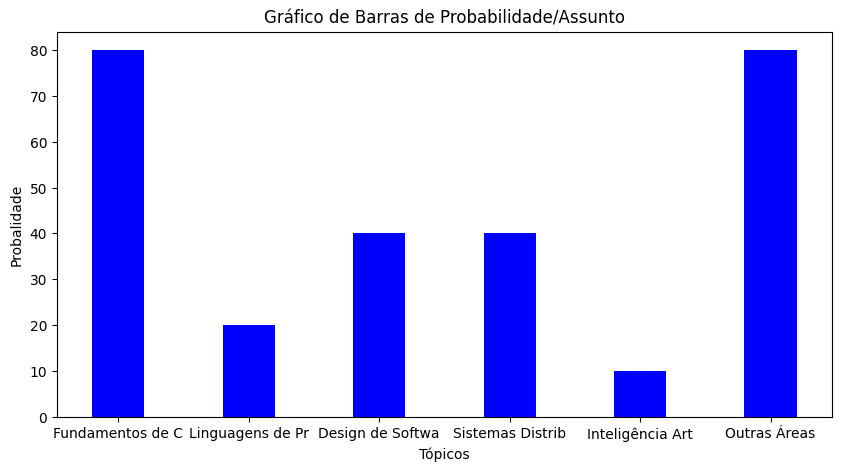

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Tratando os dados do DataFrame Entrevista, coluna Porcentagem
porcentagem_dados = entrevista_df.Porcentagem.to_list()

new_topicos = []

for elemento in porcentagem_dados:
  new_topicos.append(elemento[0])

# Tratando os dados do DataFrame Entrevista, coluna Topico (Tópicos)
valores_temp = entrevista_df.Topicos.to_list()
valores_temp_reduzido = []

for frase in valores_temp:
  valores_temp_reduzido.append(frase[0:16])


fig = plt.figure(figsize = (10, 5))

# Criando o gráfico de colunas
plt.bar(valores_temp_reduzido, new_topicos, color ='blue',
        width = 0.4)

plt.xlabel("Tópicos")
plt.ylabel("Probalidade")
plt.title("Gráfico de Barras de Probabilidade/Assunto")
plt.show()

# Gerando questões sobre cada tópico

In [ ]:
# Colocando os subtópicos com os seus respectivos pares de probabilidade dentro de uma tupla
lista_de_subtopicos = entrevista_df.Subtopico.to_list()
assunto_string = []
assunto_probabilidade = []

for sub in lista_de_subtopicos:
  for assunto in sub:
    assunto_string.append(assunto)

a = 0
for probabilidade in porcentagens:
  for i in range(len(probabilidade)):
    assunto_probabilidade.append((assunto_string[a], probabilidade[i]))
    a += 1

print(assunto_probabilidade)

[(' Estruturas de Dados (arrays, listas, pilhas, filas, árvores, gráficos)', 80), (' Algoritmos (busca, classificação, programação dinâmica, algoritmos gananciosos)', 70), (' Complexidade Computacional (notação Big-O, análise de tempo e espaço)', 50), (' Sistemas Operacionais (gerenciamento de processos, memória, E/S)', 40), (' Redes de Computadores (protocolos, topologias, segurança)', 40), (' Bancos de Dados (SQL, NoSQL, modelagem de dados)', 40), (' Linguagens de programação orientadas a objetos (Java, C++, Python)', 20), (' Linguagens de programação funcionais (Haskell, Lisp, Scala)', 10), (' Linguagens de programação de baixo nível (C, Assembly)', 40), (' Linguagens de script (JavaScript, PHP, Ruby)', 40), (' Princípios de design de software (SOLID, DRY, KISS)', 40), (' Padrões de design (padrões de criação, estruturais, comportamentais)', 40), (' Arquitetura de software (camadas, microsserviços, arquitetura orientada a eventos)', 40), (' Metodologias de desenvolvimento de softwar

## Usando o Gemini para obter questões por assuntos em relação a probabilidade do mesmos

In [ ]:
quantidade_maior_probabilidade = 2
quantidade_menor_probabilidade = 1

resposta = chat.send_message(f"Gere questões sobre cada assunto da lista de tuplas: {assunto_probabilidade}, \
onde a primeira posição é o assunto, enquanto a segunda é a probabilidade de cada assunto. Se a probabilidade for maior que 50, deve-se ter: {quantidade_maior_probabilidade}, \
enquanto para a probabilidade menor que 50 deverá ter: {quantidade_menor_probabilidade} de questões.")
print(resposta.text)

# Final!
## OBS.: As probabilidades obtidas são meramente exemplificativas, o próprio Gemini diz isso, no futuro, talvez, consigamos melhores probabilidades. Em relação a última parte a primeira probabilidade de cada assunto está errada, pois a mesma é do Tópico e não do Subtópico, houve um erro em relação ao uso do Gemini para mim, porque não tenho acesso ao pro😅, então não tive como gerar novamente os dados tendo que usar os que já tinha, caso não o fizesse teria-se o erro IndexError: list index out of range! Então, caso se queira usar de forma mais correta o código, deve-se modificar a penúltima célula! Esse código está muito além do ideal ainda, mas é só uma exemplificação de como se poderia usar o Gemini para a área acadêmica!
